In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
#MNIST hand written digits dataset - load datasets(image data)

In [3]:
from sklearn import datasets

In [4]:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

In [5]:
from sklearn.datasets import load_digits
digits = load_digits()

In [6]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

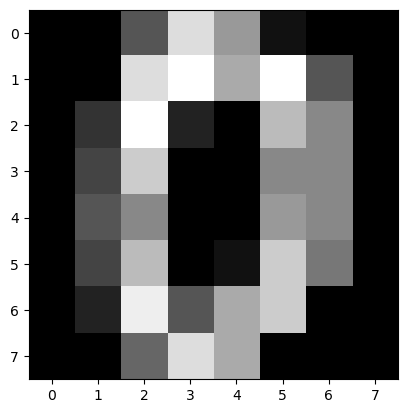

In [7]:
plt.imshow(digits.images[0], cmap = plt.cm.gray)

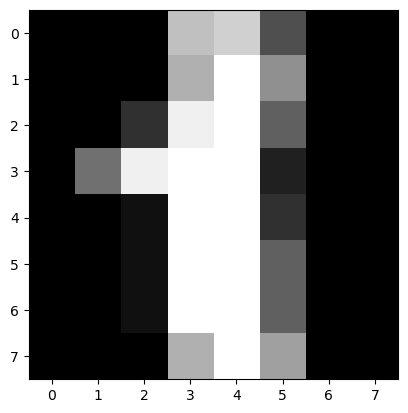

In [8]:
plt.imshow(digits.images[1], cmap = plt.cm.gray)

In [9]:
data1 = pd.DataFrame(digits.data)
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [10]:
data1.shape

(1797, 64)

In [11]:
1797*64

115008

In [12]:
digits.images.shape

(1797, 8, 8)

In [13]:
digits.data[0:6]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [14]:
digits.target[0:6]

array([0, 1, 2, 3, 4, 5])

In [15]:
 for i,j in enumerate(['el1', 'el2','el3']):
        print(i)
        print(j)  # build in function - iterates sequence of tuples or data 

0
el1
1
el2
2
el3


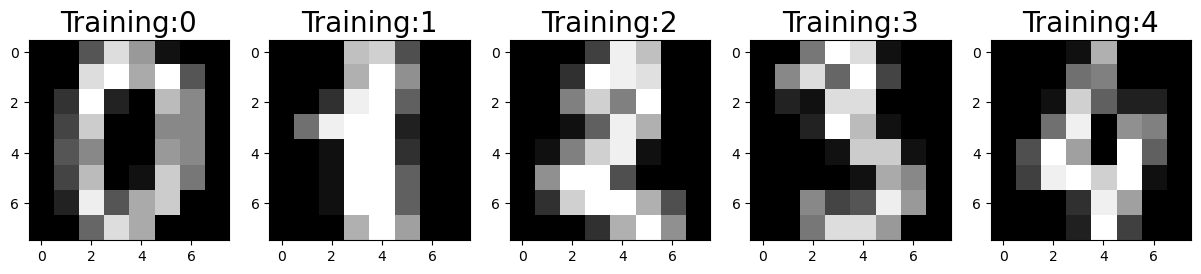

In [16]:
plt.figure(figsize=(15,4))
for index,(image,label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image,(8,8)), cmap = plt.cm.gray)
    plt.title(f"Training:{label}", fontsize = 20)

In [17]:
x = digits.data
y = digits.target

In [18]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [19]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [20]:
x.shape

(1797, 64)

In [21]:
y.shape

(1797,)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [23]:
X_sc = sc.fit_transform(x)
X_sc

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [24]:
X_sc.shape #shape never changes even after standardising

(1797, 64)

In [25]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1797.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,1797.0,0.303840,0.907192,0.0,0.0,0.0,0.0,8.0
2,1797.0,5.204786,4.754826,0.0,1.0,4.0,9.0,16.0
3,1797.0,11.835838,4.248842,0.0,10.0,13.0,15.0,16.0
4,1797.0,11.848080,4.287388,0.0,10.0,13.0,15.0,16.0
...,...,...,...,...,...,...,...,...
59,1797.0,12.089037,4.374694,0.0,11.0,13.0,16.0,16.0
60,1797.0,11.809126,4.933947,0.0,10.0,14.0,16.0,16.0
61,1797.0,6.764051,5.900623,0.0,0.0,6.0,12.0,16.0
62,1797.0,2.067891,4.090548,0.0,0.0,0.0,2.0,16.0


In [26]:
X1 = X_sc.T
X1

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.33501649, -0.33501649, -0.33501649, ..., -0.33501649,
        -0.33501649, -0.33501649],
       [-0.04308102, -1.09493684, -1.09493684, ..., -0.88456568,
        -0.67419451,  1.00877481],
       ...,
       [-1.14664746,  0.54856067,  1.56568555, ..., -0.12952258,
         0.8876023 ,  0.8876023 ],
       [-0.5056698 , -0.5056698 ,  1.6951369 , ..., -0.5056698 ,
        -0.5056698 , -0.26113572],
       [-0.19600752, -0.19600752, -0.19600752, ..., -0.19600752,
        -0.19600752, -0.19600752]])

In [27]:
X1.shape

(64, 1797)

In [28]:
cov_mat = np.cov(X_sc.T)
cov_mat

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.00055679,  0.55692803, ..., -0.02988686,
         0.02656195, -0.04391324],
       [ 0.        ,  0.55692803,  1.00055679, ..., -0.04120565,
         0.07263924,  0.08256908],
       ...,
       [ 0.        , -0.02988686, -0.04120565, ...,  1.00055679,
         0.64868875,  0.26213704],
       [ 0.        ,  0.02656195,  0.07263924, ...,  0.64868875,
         1.00055679,  0.62077355],
       [ 0.        , -0.04391324,  0.08256908, ...,  0.26213704,
         0.62077355,  1.00055679]])

In [29]:
'''How to find eigen values? 
correlation - standardised measure that indicates the strength 
and directions of the linear realtionship of 2 variables. values can range from
minus 1 to 1. unitless, easy to interpret
covariance - is a measure of how 2 variables vary together, values from
-ve infinity to +ve infinity. measured in units, difficult to interpret
'''

'How to find eigen values? \ncorrelation - standardised measure that indicates the strength \nand directions of the linear realtionship of 2 variables. values can range from\nminus 1 to 1. unitless, easy to interpret\ncovariance - is a measure of how 2 variables vary together, values from\n-ve infinity to +ve infinity. measured in units, difficult to interpret\n'

In [30]:
eig_vals,eig_vecs = np.linalg.eig(cov_mat)
eig_vals

array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ,
       2.57204442, 2.40600941, 2.06867355, 1.82993314, 1.78951739,
       1.69784616, 1.57287889, 1.38870781, 1.35933609, 1.32152536,
       1.16829176, 1.08368678, 0.99977862, 0.97438293, 0.90891242,
       0.82271926, 0.77631014, 0.71155675, 0.64552365, 0.59527399,
       0.5765018 , 0.52673155, 0.5106363 , 0.48686381, 0.45560107,
       0.44285155, 0.42230086, 0.3991063 , 0.39110111, 0.36094517,
       0.34860306, 0.3195963 , 0.29406627, 0.27692285, 0.05037444,
       0.06328961, 0.258273  , 0.24783029, 0.2423566 , 0.07635394,
       0.08246812, 0.09018543, 0.09840876, 0.10250434, 0.11188655,
       0.11932898, 0.12426371, 0.13321081, 0.14311427, 0.217582  ,
       0.15818474, 0.16875236, 0.20799593, 0.17612894, 0.2000909 ,
       0.18983516, 0.        , 0.        , 0.        ])

In [31]:
eig_vecs

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.18223392, -0.04702701,  0.02358821, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.285868  , -0.0595648 , -0.05679875, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.103198  ,  0.24261778, -0.02227952, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1198106 ,  0.16508926,  0.10036559, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07149362,  0.07132924,  0.09244589, ...,  0.        ,
         0.        ,  0.        ]])

In [32]:
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse = True)]
# individual explained variance 
var_exp

[12.033916097734911,
 9.561054403097843,
 8.444414892624566,
 6.49840790752416,
 4.860154875966413,
 4.2141198692719435,
 3.9420828035673607,
 3.3893809246383495,
 2.99822101162523,
 2.9320025512522196,
 2.781805463550328,
 2.5770550925819977,
 2.2753033157642455,
 2.2271797395143547,
 2.165229431849249,
 1.9141666064421332,
 1.7755470851681978,
 1.6380692742844287,
 1.5964601688623508,
 1.4891911870878203,
 1.3479695658179398,
 1.2719313702347577,
 1.165837350591952,
 1.0576465985363217,
 0.9753159471981117,
 0.9445589897319986,
 0.8630138269707236,
 0.836642853668514,
 0.7976932484112412,
 0.7464713709260603,
 0.7255821513702759,
 0.6919112454811802,
 0.6539085355726174,
 0.6407925738459863,
 0.5913841117223423,
 0.571162405223523,
 0.5236368034166368,
 0.4818075864451427,
 0.4537192598584497,
 0.4231627532327799,
 0.4060530699790384,
 0.39708480827582765,
 0.3564933031426176,
 0.34078718147029935,
 0.32783533528795405,
 0.3110320073453568,
 0.28857529410893323,
 0.2764892635235456,


In [33]:
# Cumulative frequency - 12+9 +8 +
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 12.0339161 ,  21.5949705 ,  30.03938539,  36.5377933 ,
        41.39794818,  45.61206805,  49.55415085,  52.94353177,
        55.94175279,  58.87375534,  61.6555608 ,  64.23261589,
        66.50791921,  68.73509895,  70.90032838,  72.81449499,
        74.59004207,  76.22811135,  77.82457152,  79.3137627 ,
        80.66173227,  81.93366364,  83.09950099,  84.15714759,
        85.13246353,  86.07702252,  86.94003635,  87.77667921,
        88.57437245,  89.32084382,  90.04642598,  90.73833722,
        91.39224576,  92.03303833,  92.62442244,  93.19558485,
        93.71922165,  94.20102924,  94.6547485 ,  95.07791125,
        95.48396432,  95.88104913,  96.23754243,  96.57832961,
        96.90616495,  97.21719696,  97.50577225,  97.78226151,
        98.04143645,  98.27591946,  98.49417632,  98.69777395,
        98.89328638,  99.07660488,  99.24455127,  99.40578733,
        99.55355002,  99.68866843,  99.81376918,  99.91746491,
       100.        , 100.        , 100.        , 100.  

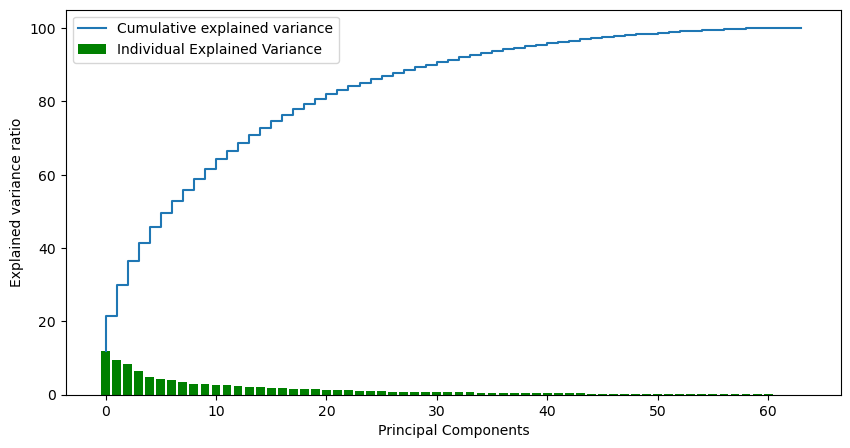

In [34]:
plt.figure(figsize=(10,5))
plt.bar(range(len(var_exp)), var_exp, label = "Individual Explained Variance", color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, label = 'Cumulative explained variance')
plt.ylabel("Explained variance ratio")
plt.xlabel('Principal Components')
plt.legend()
plt.show()

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X_sc, y, train_size = 0.8 )

In [38]:
x_train.shape

(1437, 64)

In [39]:
x_test.shape

(360, 64)

In [40]:
pca = PCA(n_components = 20)
pca_x_train = pca.fit_transform(x_train)
pca_x_test = pca.transform(x_test)

In [68]:
pca_x_train.shape

(1437, 20)

In [69]:
pca_x_test.shape

(360, 20)

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

In [42]:
dt = DecisionTreeClassifier()

In [43]:
dt.fit(pca_x_train,y_train)

DecisionTreeClassifier()

In [44]:
dt_pred = dt.predict(pca_x_test)
dt_pred

array([3, 9, 5, 2, 9, 6, 9, 7, 0, 2, 7, 8, 1, 7, 4, 3, 3, 0, 7, 3, 5, 4,
       1, 8, 4, 9, 5, 2, 3, 7, 7, 3, 5, 9, 0, 9, 7, 3, 5, 4, 2, 1, 1, 8,
       2, 6, 8, 1, 4, 1, 3, 6, 6, 9, 2, 4, 1, 6, 5, 9, 6, 7, 1, 3, 1, 3,
       0, 4, 3, 9, 7, 6, 5, 4, 4, 0, 0, 4, 6, 6, 5, 7, 8, 7, 9, 8, 6, 2,
       0, 0, 6, 7, 2, 4, 0, 3, 6, 1, 1, 2, 1, 0, 1, 1, 7, 2, 8, 2, 6, 6,
       0, 3, 9, 7, 3, 2, 1, 5, 9, 2, 1, 8, 0, 1, 9, 6, 6, 4, 1, 8, 3, 1,
       1, 8, 2, 8, 4, 2, 0, 4, 9, 0, 2, 5, 4, 7, 0, 9, 2, 7, 1, 3, 1, 1,
       9, 0, 1, 1, 0, 3, 4, 6, 4, 1, 7, 6, 8, 4, 8, 5, 0, 6, 5, 0, 5, 8,
       9, 6, 4, 8, 6, 5, 3, 4, 7, 4, 2, 2, 5, 5, 4, 2, 7, 3, 8, 3, 5, 2,
       2, 7, 4, 6, 4, 5, 6, 5, 8, 3, 2, 6, 0, 2, 4, 4, 8, 7, 8, 0, 9, 3,
       9, 4, 4, 5, 4, 3, 3, 5, 9, 4, 3, 1, 3, 0, 1, 6, 4, 4, 6, 6, 4, 1,
       8, 5, 9, 9, 7, 7, 0, 5, 1, 8, 1, 3, 9, 6, 5, 9, 8, 3, 6, 1, 8, 2,
       5, 3, 1, 9, 9, 5, 6, 2, 0, 4, 0, 0, 9, 2, 3, 5, 7, 7, 7, 1, 6, 7,
       6, 6, 2, 9, 9, 9, 3, 7, 3, 2, 4, 4, 7, 5, 8,

In [45]:
confusion_matrix(dt_pred,y_test )

array([[30,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  2,  1,  1,  1,  0,  1,  2,  3],
       [ 0,  2, 29,  1,  1,  0,  0,  1,  1,  0],
       [ 0,  1,  1, 27,  0,  2,  0,  1,  4,  3],
       [ 0,  2,  0,  0, 37,  1,  1,  1,  0,  0],
       [ 0,  1,  1,  0,  0, 31,  0,  3,  0,  2],
       [ 0,  0,  1,  1,  0,  3, 32,  1,  0,  2],
       [ 0,  1,  1,  0,  2,  0,  0, 29,  0,  1],
       [ 1,  3,  2,  1,  0,  0,  0,  1, 19,  1],
       [ 0,  0,  1,  4,  0,  1,  0,  1,  0, 26]], dtype=int64)

In [46]:
accuracy_score(dt_pred, y_test)

0.8055555555555556

In [47]:
dt_pred

array([3, 9, 5, 2, 9, 6, 9, 7, 0, 2, 7, 8, 1, 7, 4, 3, 3, 0, 7, 3, 5, 4,
       1, 8, 4, 9, 5, 2, 3, 7, 7, 3, 5, 9, 0, 9, 7, 3, 5, 4, 2, 1, 1, 8,
       2, 6, 8, 1, 4, 1, 3, 6, 6, 9, 2, 4, 1, 6, 5, 9, 6, 7, 1, 3, 1, 3,
       0, 4, 3, 9, 7, 6, 5, 4, 4, 0, 0, 4, 6, 6, 5, 7, 8, 7, 9, 8, 6, 2,
       0, 0, 6, 7, 2, 4, 0, 3, 6, 1, 1, 2, 1, 0, 1, 1, 7, 2, 8, 2, 6, 6,
       0, 3, 9, 7, 3, 2, 1, 5, 9, 2, 1, 8, 0, 1, 9, 6, 6, 4, 1, 8, 3, 1,
       1, 8, 2, 8, 4, 2, 0, 4, 9, 0, 2, 5, 4, 7, 0, 9, 2, 7, 1, 3, 1, 1,
       9, 0, 1, 1, 0, 3, 4, 6, 4, 1, 7, 6, 8, 4, 8, 5, 0, 6, 5, 0, 5, 8,
       9, 6, 4, 8, 6, 5, 3, 4, 7, 4, 2, 2, 5, 5, 4, 2, 7, 3, 8, 3, 5, 2,
       2, 7, 4, 6, 4, 5, 6, 5, 8, 3, 2, 6, 0, 2, 4, 4, 8, 7, 8, 0, 9, 3,
       9, 4, 4, 5, 4, 3, 3, 5, 9, 4, 3, 1, 3, 0, 1, 6, 4, 4, 6, 6, 4, 1,
       8, 5, 9, 9, 7, 7, 0, 5, 1, 8, 1, 3, 9, 6, 5, 9, 8, 3, 6, 1, 8, 2,
       5, 3, 1, 9, 9, 5, 6, 2, 0, 4, 0, 0, 9, 2, 3, 5, 7, 7, 7, 1, 6, 7,
       6, 6, 2, 9, 9, 9, 3, 7, 3, 2, 4, 4, 7, 5, 8,

In [48]:
y_test

array([3, 9, 5, 2, 9, 9, 3, 7, 0, 2, 7, 8, 1, 1, 4, 3, 5, 0, 7, 3, 5, 1,
       1, 8, 6, 9, 5, 2, 3, 7, 7, 8, 5, 9, 0, 9, 7, 3, 5, 4, 2, 1, 1, 8,
       1, 6, 8, 3, 4, 1, 3, 5, 6, 9, 7, 4, 1, 6, 5, 9, 7, 7, 1, 3, 1, 3,
       0, 4, 8, 9, 7, 6, 5, 4, 4, 0, 0, 4, 6, 6, 5, 7, 1, 9, 9, 8, 2, 2,
       0, 0, 6, 7, 2, 4, 0, 1, 6, 1, 1, 2, 1, 0, 9, 1, 7, 2, 2, 2, 6, 6,
       0, 9, 9, 7, 3, 2, 2, 9, 9, 2, 4, 7, 0, 1, 9, 6, 6, 4, 1, 8, 3, 1,
       1, 8, 2, 8, 4, 2, 0, 4, 5, 0, 2, 1, 4, 7, 0, 9, 2, 7, 1, 9, 1, 1,
       9, 0, 1, 1, 0, 3, 4, 6, 4, 1, 7, 6, 0, 4, 8, 5, 0, 6, 5, 0, 5, 8,
       2, 6, 4, 2, 6, 5, 8, 4, 7, 4, 2, 2, 5, 5, 4, 2, 7, 9, 8, 3, 5, 2,
       2, 7, 4, 6, 4, 9, 6, 5, 8, 3, 2, 6, 0, 2, 4, 4, 8, 7, 8, 0, 3, 2,
       9, 1, 4, 5, 4, 3, 3, 5, 9, 4, 3, 7, 3, 0, 1, 6, 4, 4, 6, 6, 4, 1,
       8, 5, 9, 9, 7, 7, 0, 5, 2, 3, 5, 3, 9, 6, 5, 9, 9, 3, 9, 1, 8, 2,
       5, 3, 1, 9, 9, 7, 6, 2, 0, 4, 0, 0, 9, 2, 3, 5, 7, 7, 4, 8, 6, 7,
       3, 6, 2, 9, 3, 9, 3, 7, 5, 4, 4, 4, 7, 5, 1,

In [50]:
def get_misclassified_index(y_pred,y_test):
    misclassification = []
    for index,(predicted, actual) in enumerate(zip(y_pred,y_test)):
        if predicted!=actual:
            misclassification.append(index)
    return misclassification

In [51]:
misclassification = get_misclassified_index(dt_pred, y_test)

In [52]:
len(misclassification)

70

In [53]:
misclassification[0:5]

[5, 6, 13, 16, 21]

In [66]:
def plot_misclassification(misclassification):
    plt.figure(figsize=(20,4))
    for index, wrong in enumerate(misclassification[0:5]):
        plt.subplot(1,5, index+1)
        plt.imshow(np.reshape(pca_x_test[wrong], (5,4)), cmap = plt.cm.gray)
        plt.title("Predcited:{} Actual:{}".format(dt_pred[wrong], y_test[wrong]))

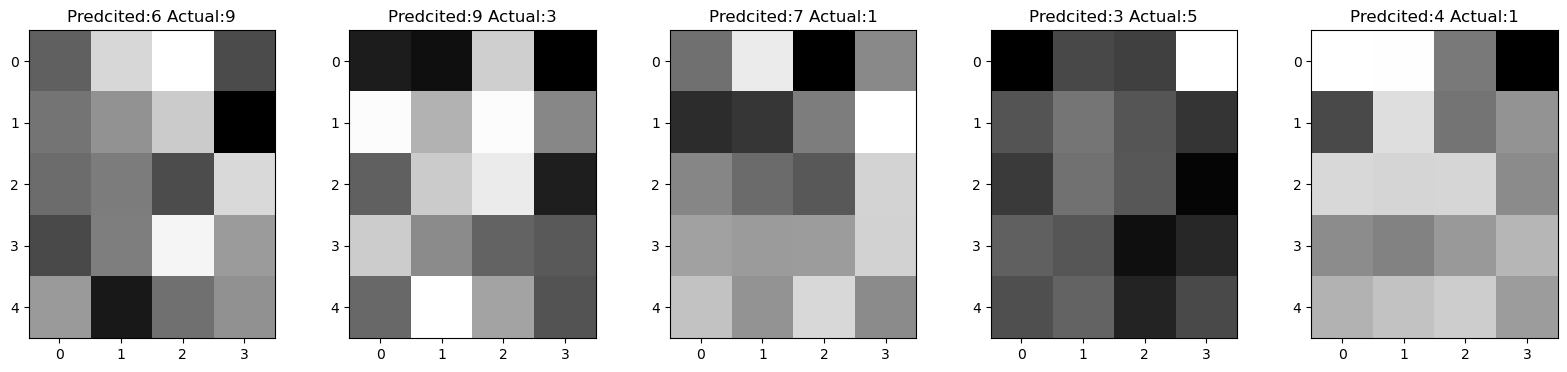

In [67]:
plot_misclassification(misclassification)